In [1]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ravi Kumar KM\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
# Import datset and create a dataframe
cars=pd.read_csv("C:\\Users\\Ravi Kumar KM\\Downloads\\New folder\\cars.csv")
cars.head()
cars.tail()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
387,mazda glc custom,31.0,4,91.0,68,1970,17.6,82,Japanese
388,mazda glc custom l,37.0,4,91.0,68,2025,18.2,82,Japanese
389,nissan stanza xe,36.0,4,120.0,88,2160,14.5,82,Japanese
390,toyota celica gt,32.0,4,144.0,96,2665,13.9,82,Japanese
391,toyota corolla,34.0,4,108.0,70,2245,16.9,82,Japanese


In [4]:
# Dummy coding cars
cars['org_num']=cars['Origin'].map({'American':0,'European':1,'Japanese':2})
cars['org_num'].head()

0    0
1    0
2    0
3    0
4    0
Name: org_num, dtype: int64

In [38]:
#correlation Matrix
x=cars.corr()
x

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,org_num
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
org_num,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


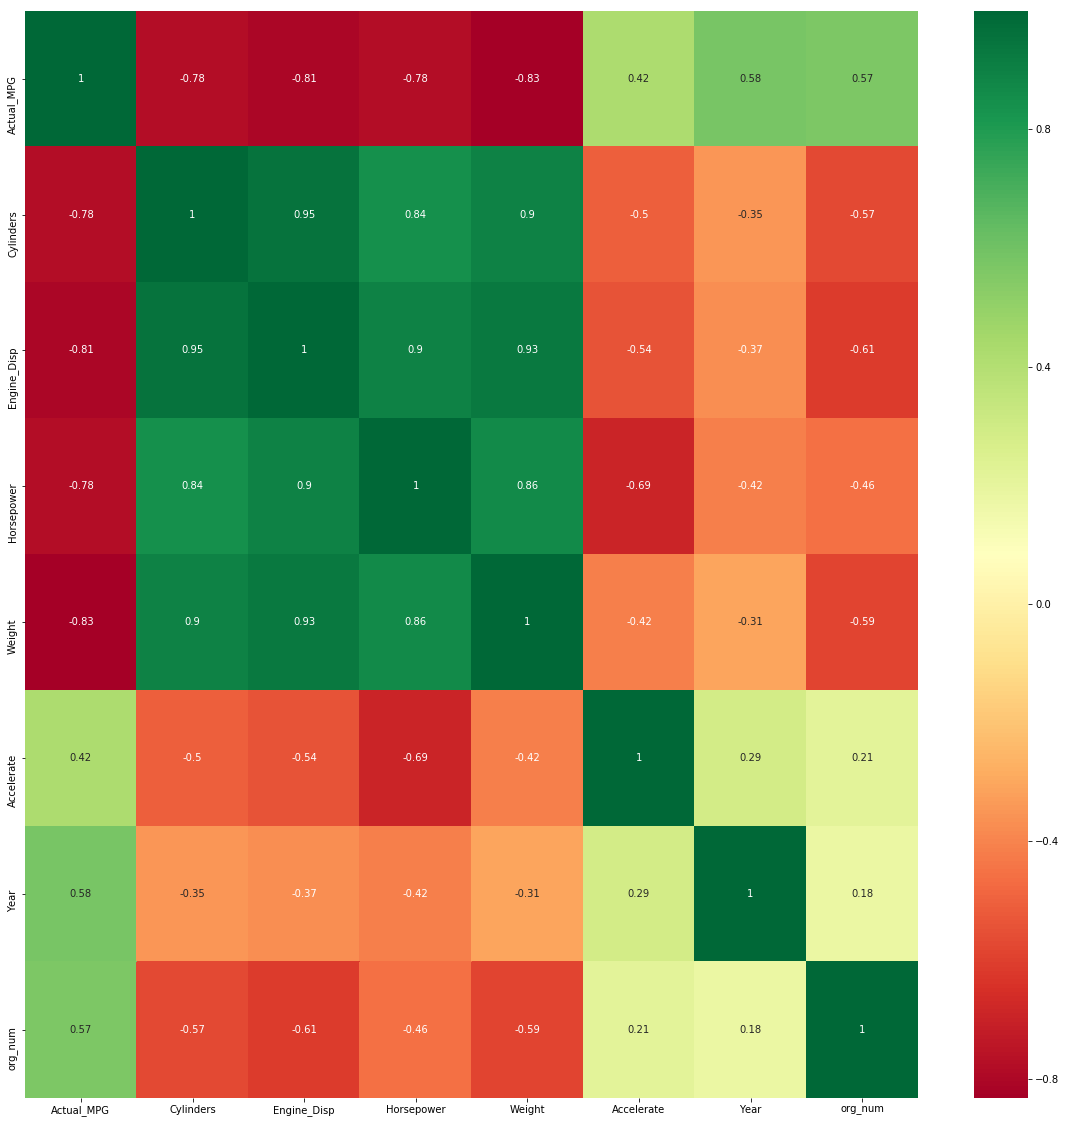

In [39]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [22]:
#Drop the Model from the dataframe
cars1=cars.drop(['Model'],axis=1)
cars2=cars1.drop(["Origin"],axis=1)

In [23]:
#Create features and labels on the dummy coded data
x= cars2.drop(['Actual_MPG'],axis=1)
y = cars2['Actual_MPG']
x.head()
y.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,org_num
0,8,390.0,190,3850,8.5,70,0
1,6,199.0,90,2648,15.0,70,0
2,6,199.0,97,2774,15.5,70,0
3,8,304.0,150,3433,12.0,70,0
4,8,455.0,225,3086,10.0,70,0


0    15.0
1    21.0
2    18.0
3    16.0
4    14.0
Name: Actual_MPG, dtype: float64

In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
# Creating Features and Labels and running correlation Heat map
# create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(294, 7)

(98, 7)

(294,)

(98,)

In [26]:
#let's import the regression object and define model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#Fir a model into train data
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Evaluate the model
predict_test=lm.predict(test_x)

In [29]:
#R2 Value
print("RSquare Value for TEST data is-")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is-")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is-


80.0

RSquare Value for TRAIN data is-


83.0

In [30]:
# Predict on test and training data
predict_test=lm.predict(test_x)

In [31]:
#Print the loss Function-MSE
import numpy as np
from sklearn import metrics
print ("Mean Square Error(MSE)for TEST data is")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Square Error(MSE)for TEST data is


12.0

In [32]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for TEST data is")
np.round(mean_absolute_error(test_y,predict_test),0)

Mean Absolute Error(MAE) for TEST data is


3.0

In [33]:
#Append Data
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['Actual_MPG']-fdf['Predicted']
fdf.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,org_num,Actual_MPG,Predicted,Prediction_Error
81,4,97.0,88,2100,16.5,72,2,27.0,27.8,-0.8
165,6,225.0,95,3785,19.0,75,0,18.0,17.4,0.6
351,4,85.0,65,1975,19.4,81,2,37.0,35.3,1.7
119,4,121.0,112,2868,15.5,73,1,19.0,22.1,-3.1
379,4,112.0,85,2575,16.2,82,0,31.0,29.2,1.8


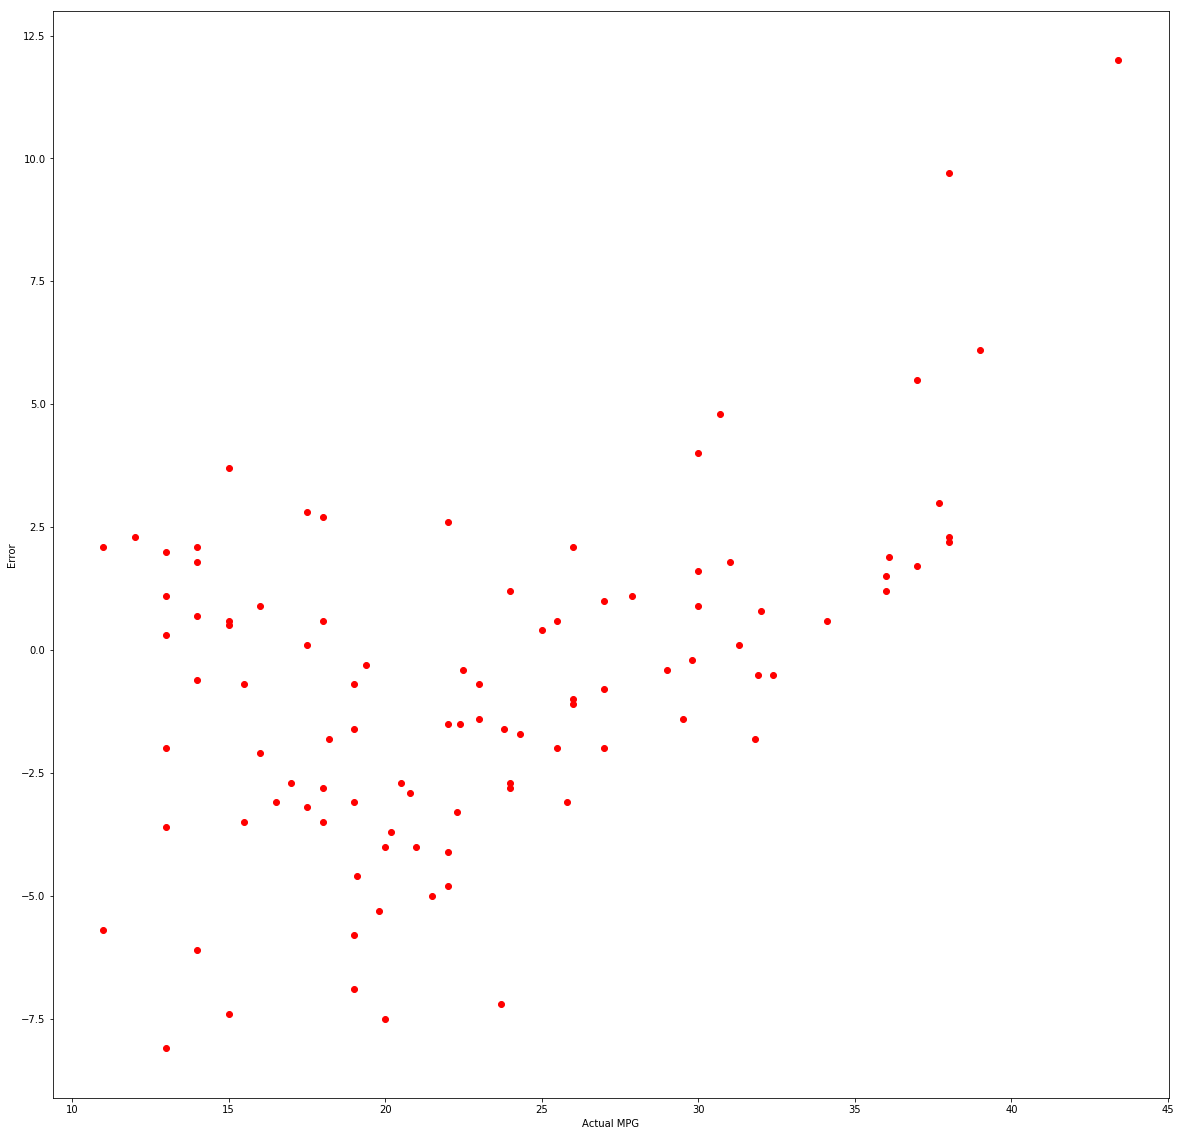

In [34]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf.Actual_MPG,fdf.Prediction_Error,color='red')
plt.xlabel('Actual MPG')
plt.ylabel("Error")
plt.show();

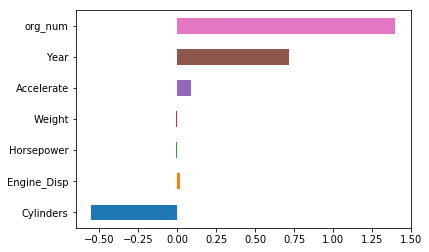

In [35]:
ft_importances =pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show();

In [36]:
len(lm.coef_)

7

In [37]:
len(x.columns)

7